In [5]:
import numpy as np # linear algebra
import pandas as pd 

import os
for dirname, _, filenames in os.walk('winequalityN.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
import pandas as pd 
import numpy as np

In [7]:
df = pd.read_csv("winequalityN.csv")

In [8]:
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
cols_at_end = ['type', 'quality']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]

In [10]:
df.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,red,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,red,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,red,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,red,5
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,red,6


In [11]:
number_of_rows, number_of_columns = df.shape

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
null_values = df.isnull()

# Check if there are any null values in each column
has_null_values = null_values.any()

# Store the results of the `any()` method in a list
columns_with_null_values = has_null_values.tolist()
print(columns_with_null_values)

[True, True, True, True, True, False, False, False, True, True, False, False, False]


In [14]:
columns = df.columns

# Get the list of columns that have null values
columns_with_null_values = [column for column, has_null_value in zip(columns, has_null_values) if has_null_value]

# Print the list of columns that have null values
print(columns_with_null_values)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']


In [15]:
df.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
type                     0
quality                  0
dtype: int64

In [16]:
df[df.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
17,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,white,8
33,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,white,6
54,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,white,6
86,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,white,6
98,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,white,4
139,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,white,6
174,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,white,5
224,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,white,6
249,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,white,5
267,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,white,5


In [3]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4d/9c/65830d4a56c47f5283eaa244dc1228c5da9c844a9f999ebcc2e69bf6cc65/matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/16/09/989b982322439faa4bafffcd669e6f942b38fee897c2664c987bcd091dec/contourpy-1.1.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/95/b6/9a5133deb5838c4dbe3ea27e8dba123622aa5112d43a079e9587636b4faf/fonttools-4.42.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/154.

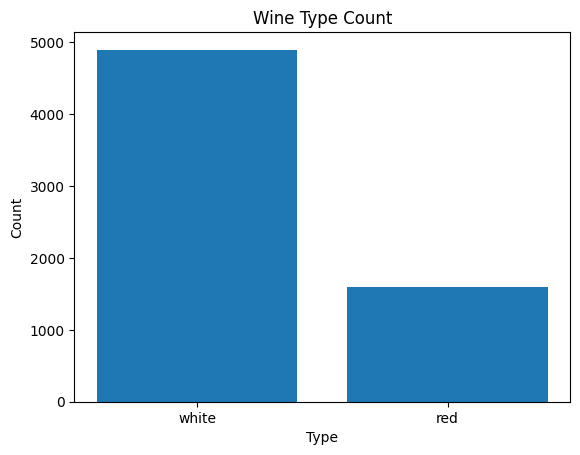

In [17]:
import matplotlib.pyplot as plt 
#lets check the distribution of all the y labels and analyze the labels.
# Get the count of wines for each type
type_counts = df["type"].value_counts()

# Create a bar plot
plt.bar(type_counts.index, type_counts.values)

# Add a title and labels to the axes
plt.title("Wine Type Count")
plt.xlabel("Type")
plt.ylabel("Count")

# Show the plot
plt.show()

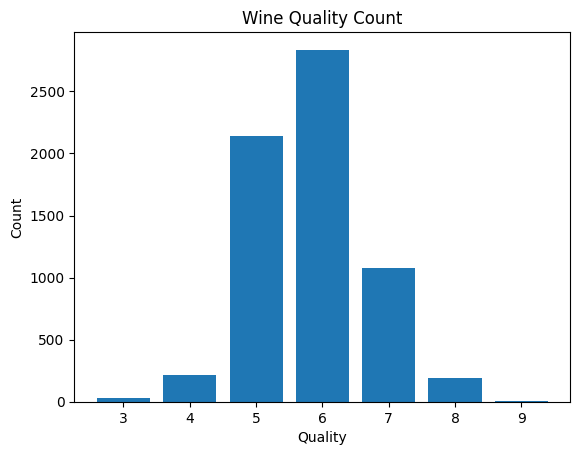

In [18]:
type_counts = df["quality"].value_counts()

# Create a bar plot
plt.bar(type_counts.index, type_counts.values)

# Add a title and labels to the axes
plt.title("Wine Quality Count")
plt.xlabel("Quality")
plt.ylabel("Count")

# Show the plot
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


le.fit(df['type'])
type_encoded = le.transform(df['type'])
df['type_encoded'] = type_encoded
df.pop('type')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_encoded
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [20]:
#since we have only few values that are null it is save to eliminate all the null values.
df_model = df.dropna(axis=0)

In [21]:
df_model.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_encoded
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier

In [24]:
y_labels = df_model[df.columns[-2:]]

# Get the remaining columns
x_features = df_model[df.columns[:-2]]

# Print the x-labels and y-labels
y_labels

,quality,type_encoded
0,6,1
1,6,1
2,6,1
3,6,1
4,6,1
...,...,...
6491,6,0
6492,5,0
6494,6,0
6495,5,0


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x_features,y_labels,test_size=0.3,random_state=7)

In [26]:
y_train

,quality,type_encoded
4172,6,1
1389,6,1
5472,6,0
5079,5,0
2656,4,1
...,...,...
5727,6,0
2574,5,1
553,7,1
1244,5,1


In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(x_train)
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [28]:
clf = MultiOutputClassifier(LogisticRegression(max_iter=1000,random_state=4))
clf.fit(X_train,y_train)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000,
                                                   random_state=4))

In [29]:
predicted_values = clf.predict(X_test)

In [30]:
predicted_values

array([[5, 1],
       [7, 0],
       [6, 1],
       ...,
       [6, 1],
       [5, 1],
       [5, 0]], dtype=int64)

In [31]:
mean_accuracy = clf.score(X_train,y_train)
accuracy_precentage = mean_accuracy * 100

accuracy_precentage

54.37665782493368